<a href="https://colab.research.google.com/github/JSEFERINO/MISALUMNOS20252/blob/main/LABORATORIO_13_FABIANA_ARIZA_MONSALVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 13 – Fabiana Ariza Monsalve**

## **Prueba de Diferencia entre Dos Medias Poblacionales**  
### *Muestras Independientes, Varianzas Desconocidas pero Iguales – Método del Valor p*

En este laboratorio se abordará la comparación entre dos medias poblacionales bajo el supuesto de que las muestras son independientes y que, aunque las varianzas poblacionales son desconocidas, se consideran iguales. El análisis se desarrollará utilizando el enfoque del valor p, permitiendo una interpretación estadística clara y rigurosa.



In [ ]:
# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython
#%%R

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.



## 💡 **Planteamiento del Problema**

Se desea comparar el rendimiento promedio en una prueba aplicada a dos grupos de estudiantes, cada uno de los cuales empleó un método de estudio distinto.

- 📘 **Grupo 1**:  
  Tamaño de la muestra: $n_1 = 15$  
  Media muestral: $\bar{x}_1 = 82$  
  Desviación estándar: $s_1 = 6$

- 📗 **Grupo 2**:  
  Tamaño de la muestra: $n_2 = 12$  
  Media muestral: $\bar{x}_2 = 78$  
  Desviación estándar: $s_2 = 8$

Dado que se asume que las **varianzas poblacionales son iguales**, se plantea la siguiente pregunta:

> ¿Existe una diferencia significativa en el rendimiento promedio entre los dos métodos de estudio, considerando un nivel de significancia de $\alpha = 0.05$?



### 📊 Comparación de medias: prueba *t* para dos muestras independientes

**Supuestos:** varianzas poblacionales iguales, muestras independientes.

---

### 📌 Datos de entrada:


Grupo 1: $n_1 = 15$, $\bar{x}_1 = 82$, $s_1 = 6$  
Grupo 2: $n_2 = 12$, $\bar{x}_2 = 78$, $s_2 = 8$  
Nivel de significancia: $\alpha = 0.05$
---

### Paso 1: Calcular la varianza combinada (pooled)

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
= \frac{(14)(36) + (11)(64)}{25}
= \frac{504 + 704}{25}
= \frac{1208}{25} = 48.32
$$

$$
s_p = \sqrt{48.32} \approx 6.95
$$

---

### Paso 2: Calcular el estadístico *t*

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
= \frac{82 - 78}{6.95 \cdot \sqrt{\frac{1}{15} + \frac{1}{12}}}
= \frac{4}{6.95 \cdot \sqrt{0.1667}}
= \frac{4}{6.95 \cdot 0.4082}
= \frac{4}{2.837} \approx 1.41
$$

---

### Paso 3: Valor crítico

$$
gl = n_1 + n_2 - 2 = 25
$$

$$
t_{\text{crítico}} (\alpha = 0.05, \text{ bilateral}) \approx \pm 2.060
$$

---

### Paso 4: Comparar y concluir

$$
|t| = 1.41 < 2.060 \Rightarrow \text{No se rechaza } H_0
$$

---

### ✅ Conclusión

A un nivel de significancia del 5%, **no hay evidencia suficiente** para afirmar que los métodos de estudio generan diferencias significativas en el rendimiento promedio de los estudiantes.



In [ ]:
%%R
# Datos iniciales
n1 <- 15; media1 <- 82; sd1 <- 6
n2 <- 12; media2 <- 78; sd2 <- 8
alfa <- 0.05

# Grados de libertad
gl <- n1 + n2 - 2

# Cálculo de la varianza combinada (pooled)
sp2 <- ((n1 - 1)*sd1^2 + (n2 - 1)*sd2^2) / gl
sp <- sqrt(sp2)

# Estadístico t
error <- sp * sqrt(1/n1 + 1/n2)
t <- (media1 - media2) / error

# Valor crítico y valor p
t_crit <- qt(1 - alfa/2, df = gl)
p_valor <- 2 * pt(abs(t), df = gl, lower.tail = FALSE)

# Decisión
if(p_valor <= alfa) {
  conclusion <- "✅ Rechazamos H₀: hay diferencia significativa."
} else {
  conclusion <- "❌ No rechazamos H₀: no hay evidencia de diferencia."
}

# Resultados
cat("Varianza combinada:", round(sp2, 3), "\n")
cat("Estadístico t:", round(t, 3), "\n")
cat("Valor crítico:", round(t_crit, 3), "\n")
cat("Valor p:", round(p_valor, 4), "\n")
cat("Conclusion:", conclusion)


Varianza combinada: 48.32 
Estadístico t: 1.486 
Valor crítico: 2.06 
Valor p: 0.1498 
Conclusion: ❌ No rechazamos H₀: no hay evidencia de diferencia.

# **Usando Python**

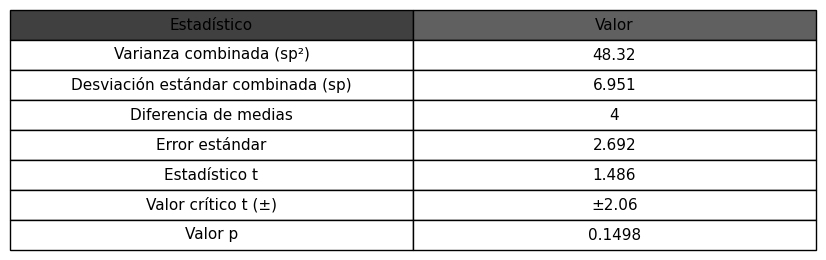

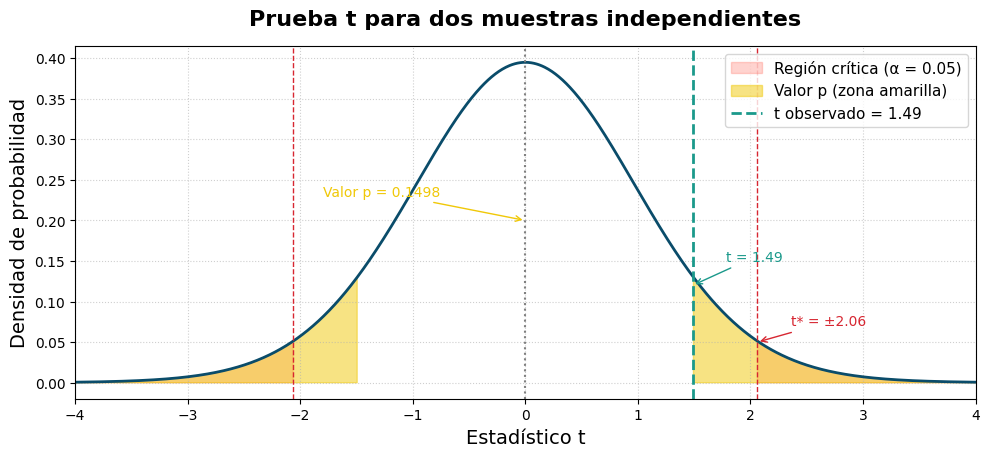

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import matplotlib.gridspec as gridspec

# --- Datos de la muestra ---
x1_bar, s1, n1 = 82, 6, 15
x2_bar, s2, n2 = 78, 8, 12
alpha = 0.05
gl = n1 + n2 - 2

# --- Cálculos estadísticos ---
sp2 = (((n1 - 1) * s1**2) + ((n2 - 1) * s2**2)) / gl          # Varianza combinada
sp = np.sqrt(sp2)                                              # Desviación estándar combinada
error_estandar = sp * np.sqrt(1/n1 + 1/n2)                    # Error estándar
diferencia = x1_bar - x2_bar                                  # Diferencia de medias
t_stat = diferencia / error_estandar                          # Estadístico t calculado
t_critico = stats.t.ppf(1 - alpha/2, gl)                      # Valor crítico bilateral
p_valor = 2 * stats.t.sf(np.abs(t_stat), df=gl)               # Valor p bilateral

# --- Crear DataFrame resumen ---
resumen = pd.DataFrame({
    'Estadístico': [
        'Varianza combinada (sp²)',
        'Desviación estándar combinada (sp)',
        'Diferencia de medias',
        'Error estándar',
        'Estadístico t',
        'Valor crítico t (±)',
        'Valor p'
    ],
    'Valor': [
        round(sp2, 3),
        round(sp, 3),
        round(diferencia, 2),
        round(error_estandar, 3),
        round(t_stat, 3),
        f"±{round(t_critico, 3)}",
        f"{p_valor:.4f}"
    ]
})

# --- Mostrar tabla resumen usando matplotlib ---
plt.figure(figsize=(8, 2))
plt.axis('off')
tabla = plt.table(cellText=resumen.values, colLabels=resumen.columns,
                  cellLoc='center', loc='center',
                  colColours=["#404040", "#606060"])
tabla.auto_set_font_size(False)
tabla.set_fontsize(11)
tabla.scale(1.3, 1.8)

# --- Configuración del gráfico ---
x_lim = max(4, abs(t_stat) + 1, t_critico + 1)
x_vals = np.linspace(-x_lim, x_lim, 1000)
y_vals = stats.t.pdf(x_vals, df=gl)

fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
ax1 = plt.subplot(gs[1])

# Curva distribución t (color azul petróleo)
ax1.plot(x_vals, y_vals, color="#0a4c6a", linewidth=2)

# Regiones críticas (áreas de rechazo) en rojo coral suave
ax1.fill_between(x_vals, y_vals, where=(x_vals < -t_critico) | (x_vals > t_critico),
                 color="#ff6f61", alpha=0.3, label="Región crítica (α = 0.05)")

# Área correspondiente al valor p en amarillo mostaza
ax1.fill_between(x_vals, y_vals, where=(x_vals < -abs(t_stat)) | (x_vals > abs(t_stat)),
                 color="#f0c808", alpha=0.5, label="Valor p (zona amarilla)")

# Líneas verticales: estadístico t y valores críticos
ax1.axvline(t_stat, color="#1b998b", linestyle='--', linewidth=2, label=f"t observado = {t_stat:.2f}")
ax1.axvline(-t_critico, color="#d72631", linestyle='dashed', linewidth=1)
ax1.axvline(t_critico, color="#d72631", linestyle='dashed', linewidth=1)
ax1.axvline(0, color="gray", linestyle=":")

# Anotaciones en el gráfico
ax1.annotate(f"t* = ±{t_critico:.2f}", xy=(t_critico, 0.05),
             xytext=(t_critico + 0.3, 0.07), color="#d72631",
             arrowprops=dict(arrowstyle="->", color="#d72631"))
ax1.annotate(f"t = {t_stat:.2f}", xy=(t_stat, 0.12),
             xytext=(t_stat + 0.3, 0.15), color="#1b998b",
             arrowprops=dict(arrowstyle="->", color="#1b998b"))
ax1.annotate(f"Valor p = {p_valor:.4f}", xy=(0, 0.2),
             xytext=(-1.8, 0.23), color="#f0c808",
             arrowprops=dict(arrowstyle="->", color="#f0c808"))

# Etiquetas y leyenda
ax1.set_title("Prueba t para dos muestras independientes",
              fontsize=16, fontweight="bold", pad=15)
ax1.set_xlabel("Estadístico t", fontsize=14)
ax1.set_ylabel("Densidad de probabilidad", fontsize=14)
ax1.legend(loc="upper right", frameon=True, fontsize=11)
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.set_xlim(-x_lim, x_lim)

plt.tight_layout()
plt.show()


---
# Ejemplo 4: Prueba t para diferencia distinta de cero"
---
## Problema

Una compañía afirma que la diferencia en el tiempo promedio de ensamblaje de un producto utilizando dos métodos distintos es de **al menos 5 minutos**:

$$
H_0: \mu_1 - \mu_2 \geq 5
$$

Se desea evaluar si los datos muestrales permiten **rechazar esta afirmación**.

---

## Datos muestrales

| Método   | Tamaño Muestral ($n$) | Media ($\bar{x}$) | Desviación Estándar ($s$) |
|:--------:|:---------------------:|:-----------------:|:-------------------------:|
| Método 1 | 18                    | 32                | 4                         |
| Método 2 | 20                    | 26                | 5                         |

---

## Formulación de hipótesis

- Hipótesis nula:  
  $$
  H_0: \mu_1 - \mu_2 \geq 5
  $$
  *(La diferencia es al menos 5 minutos)*

- Hipótesis alternativa:  
  $$
  H_1: \mu_1 - \mu_2 < 5
  $$
  *(La diferencia es menor a 5 minutos)*

- Nivel de significancia:  
  $$
  \alpha = 0.10
  $$


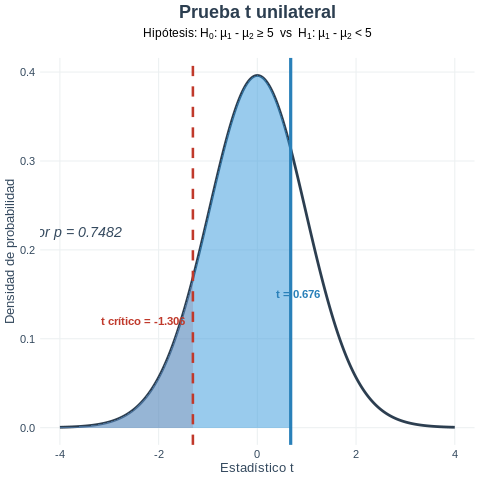

In [ ]:
%%R
# @title Gráfico en R
library(ggplot2)
library(scales)

# Datos y cálculos (ya están definidos, los dejo para contexto)
x1 <- 32; s1 <- 4; n1 <- 18
x2 <- 26; s2 <- 5; n2 <- 20
alfa <- 0.10
delta0 <- 5
gl <- n1 + n2 - 2

sp2 <- ((n1 - 1) * s1^2 + (n2 - 1) * s2^2) / gl
sp <- sqrt(sp2)
se <- sp * sqrt(1/n1 + 1/n2)
t <- ((x1 - x2) - delta0) / se
t_crit <- qt(alfa, df = gl, lower.tail = TRUE)
p_valor <- pt(t, df = gl)

# Datos para gráfico
x_vals <- seq(-4, 4, length.out = 1000)
df <- data.frame(x = x_vals, y = dt(x_vals, df = gl))

ggplot(df, aes(x, y)) +
  geom_line(color = "#2c3e50", size = 1.3) +  # curva principal azul oscuro
  geom_ribbon(data = subset(df, x <= t_crit), aes(ymax = y), ymin = 0, fill = "#e74c3c", alpha = 0.25) +  # región crítica rojo suave
  geom_ribbon(data = subset(df, x <= t), aes(ymax = y), ymin = 0, fill = "#3498db", alpha = 0.5) +  # área p-valor azul claro
  geom_vline(xintercept = t, color = "#2980b9", size = 1.5) +  # línea t observado azul vivo
  geom_vline(xintercept = t_crit, color = "#c0392b", linetype = "dashed", size = 1.2) +  # línea t crítico rojo
  annotate("text", x = t_crit - 0.15, y = 0.12, label = paste0("t crítico = ", round(t_crit, 3)), color = "#c0392b", size = 4, fontface = "bold", hjust = 1) +
  annotate("text", x = t + 0.15, y = 0.15, label = paste0("t = ", round(t, 3)), color = "#2980b9", size = 4, fontface = "bold") +
  annotate("text", x = -3.8, y = 0.22, label = paste0("Valor p = ", round(p_valor, 4)), color = "#34495e", size = 5, fontface = "italic") +
  labs(
    title = "Prueba t unilateral",
    subtitle = expression(paste("Hipótesis: ", H[0], ": ", mu[1], " - ", mu[2], " ", "\u2265 5", "  vs  ", H[1], ": ", mu[1], " - ", mu[2], " < 5")),
    x = "Estadístico t",
    y = "Densidad de probabilidad"
  ) +
  theme_minimal(base_family = "Arial") +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "#2c3e50"),
    plot.subtitle = element_text(size = 12, hjust = 0.5, margin = margin(b = 15)),
    axis.title = element_text(size = 13, color = "#34495e"),
    axis.text = element_text(size = 11, color = "#34495e"),
    panel.grid.major = element_line(color = "#ecf0f1"),
    panel.grid.minor = element_blank()
  )




📊 Tabla resumen - Prueba t unilateral:

╒════════════════════════════════════╤═════════╕
│ Estadístico                        │   Valor │
╞════════════════════════════════════╪═════════╡
│ Varianza combinada (sp²)           │ 20.75   │
├────────────────────────────────────┼─────────┤
│ Desviación estándar combinada (sp) │  4.555  │
├────────────────────────────────────┼─────────┤
│ Error estándar (SE)                │  1.48   │
├────────────────────────────────────┼─────────┤
│ Diferencia de medias - delta₀      │  1      │
├────────────────────────────────────┼─────────┤
│ Estadístico t                      │  0.676  │
├────────────────────────────────────┼─────────┤
│ Valor crítico t (α = 0.10)         │ -1.306  │
├────────────────────────────────────┼─────────┤
│ Valor p                            │  0.7482 │
╘════════════════════════════════════╧═════════╛


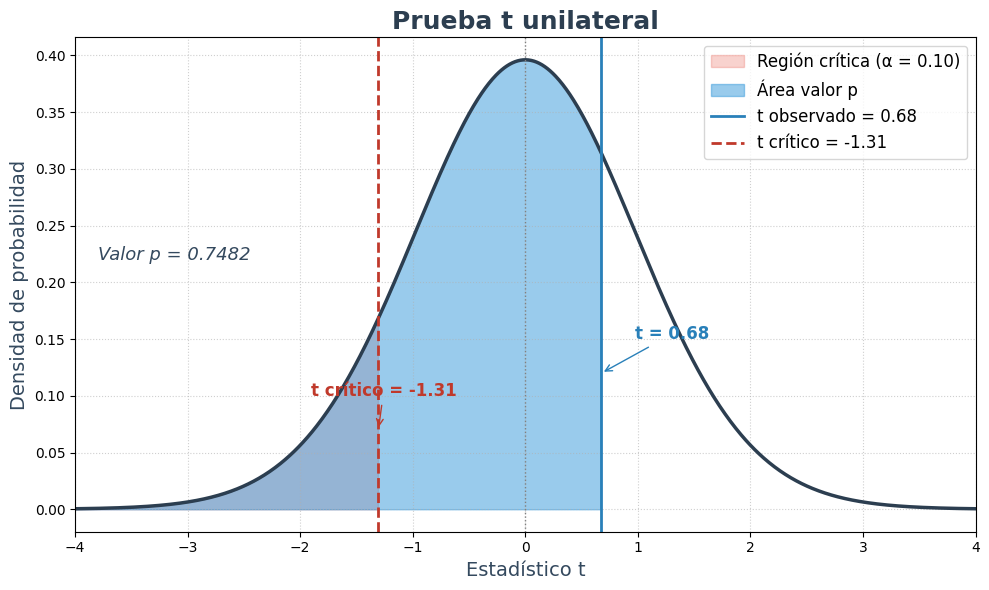

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# Datos
x1, s1, n1 = 32, 4, 18
x2, s2, n2 = 26, 5, 20
alpha = 0.10
delta0 = 5
gl = n1 + n2 - 2

# Cálculos
sp2 = (((n1 - 1) * s1**2) + ((n2 - 1) * s2**2)) / gl
sp = np.sqrt(sp2)
se = sp * np.sqrt(1/n1 + 1/n2)
t_stat = ((x1 - x2) - delta0) / se
t_crit = stats.t.ppf(alpha, df=gl)  # Prueba unilateral izquierda
p_valor = stats.t.cdf(t_stat, df=gl)

# Tabla de resultados
tabla = pd.DataFrame({
    'Estadístico': [
        'Varianza combinada (sp²)',
        'Desviación estándar combinada (sp)',
        'Error estándar (SE)',
        'Diferencia de medias - delta₀',
        'Estadístico t',
        'Valor crítico t (α = 0.10)',
        'Valor p'
    ],
    'Valor': [
        round(sp2, 3),
        round(sp, 3),
        round(se, 3),
        round((x1 - x2) - delta0, 3),
        round(t_stat, 3),
        round(t_crit, 3),
        round(p_valor, 4)
    ]
})

# Mostrar tabla en consola
print("\n📊 Tabla resumen - Prueba t unilateral:\n")
print(tabulate(tabla, headers='keys', tablefmt='fancy_grid', showindex=False))

# Gráfico de la distribución t mejorado
x_vals = np.linspace(-4, 4, 1000)
y_vals = stats.t.pdf(x_vals, df=gl)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_vals, y_vals, color="#2c3e50", linewidth=2.5)  # curva principal azul oscuro

# Región crítica y valor p con transparencias y colores suaves
ax.fill_between(x_vals, y_vals, where=(x_vals <= t_crit), color="#e74c3c", alpha=0.25, label="Región crítica (α = 0.10)")
ax.fill_between(x_vals, y_vals, where=(x_vals <= t_stat), color="#3498db", alpha=0.5, label="Área valor p")

# Líneas verticales con colores definidos
ax.axvline(x=t_stat, color="#2980b9", linestyle='-', linewidth=2, label=f"t observado = {t_stat:.2f}")
ax.axvline(x=t_crit, color="#c0392b", linestyle='--', linewidth=2, label=f"t crítico = {t_crit:.2f}")
ax.axvline(0, color="gray", linestyle=":", linewidth=1)

# Anotaciones con estilo y posición ajustada
ax.annotate(f"t = {t_stat:.2f}", xy=(t_stat, 0.12), xytext=(t_stat + 0.3, 0.15),
            color="#2980b9", fontsize=12, fontweight='bold',
            arrowprops=dict(arrowstyle="->", color="#2980b9"))

ax.annotate(f"t crítico = {t_crit:.2f}", xy=(t_crit, 0.07), xytext=(t_crit - 0.6, 0.1),
            color="#c0392b", fontsize=12, fontweight='bold',
            arrowprops=dict(arrowstyle="->", color="#c0392b"))

ax.text(-3.8, 0.22, f"Valor p = {p_valor:.4f}", color="#34495e", fontsize=13, style='italic')

# Estética general
ax.set_title("Prueba t unilateral", fontsize=18, fontweight="bold", color="#2c3e50")
ax.set_xlabel("Estadístico t", fontsize=14, color="#34495e")
ax.set_ylabel("Densidad de probabilidad", fontsize=14, color="#34495e")
ax.legend(loc="upper right", fontsize=12)
ax.grid(True, linestyle=':', alpha=0.6)
ax.set_xlim(-4, 4)

plt.tight_layout()
plt.show()

